# CH2. Data and Sampling Distributions

**데이터와 표본분포**

2.1 임의표본추출(random sampling)과 표본편향(sample bias)

2.2 선택편향(selection bias)

2.3 통계학에서의 표본분포

2.4 부트스트랩

2.5 신뢰구간

**2.6 정규분포**

용어정리

> 오차(error): 데이터 포인트와 예측값 혹은 평균 사이의 차이

> 표준화(정규화)하다(standardize): 평균을 빼고 표준편차로 나누는 것

> z-score: 개별 데이터 포인트를 정규화한 결과 값

> 표준정규분포(standard normal distribution): 평균 = 0, 표준편차 = 1인 정규분포

> QQ-plot: 표본분포가 특정 분포(예: 정규분포)에 얼마나 가까운지를 보여주는 그림

##### _주의: 정상이라서 normal분포라고 부르는 것이 아니며, 실제로 전형적인 데이터 사이언프 프로젝트에서 쓰는 대부분의 변수들이나 실제 대부분의 raw data는 전반적으로 정규분포를 따르지 않는다.. 표본분포에서 대부분의 통계량이 정규분포를 따른다는 점에서 정규분포의 유용함이 드러날 뿐이다. 그렇긴하지만, 일반적으로 정규분포 가정은 경험적 확률분포나 부트스트랩 분포를 구할 수 없는 경우 사용되는 최후의 수단이다._

이 교재에서는 정규화와 표준화를 혼용하여 쓰지만, 내가 배우기로는 표준화는 여기서 얘기하는 표준화가 맞으며 (분모가 표준편차), 

정규화는 각 변수들 사이의 값 스케일 차이를 줄이기 위해 (상대적 크기에 의한 영향을 줄이기 위하여) 0과 1사이의 값으로 만들어주는(분모가 $X_{max} - X_{min}$) 것으로 알고 있다.

그 차이에 주의하며 공부를 진행한다.

In [1]:
# 라이브러리 불러오기

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

## 데이터 import

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

# 정규분포
---
2.6 Standard Distribution

## 표준 정규분포와 QQ plot

표준정규분포는 x축의 단위가 평균의 표준편차로 표현되는 정규분포를 뜻한다. 데이터를 표준정규분포와 비교하려면 데이터를 표준화하기 위해 데이터에서 평균을 뺸 다음 표준편차로 나누면 된다.

표준화하여 변환한 값을 z-score라고 하며, 정규분포를 z-distribution이라고도 한다.



### 표준정규분포로부터 추출한 100개의 표본의 QQplot

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

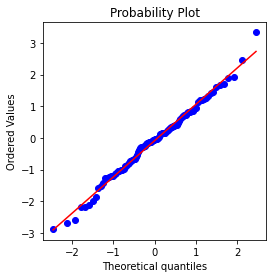

In [4]:
fig, ax = plt.subplots(figsize = (4, 4))    # 그래프 사이즈
norm_sample = stats.norm.rvs(size=100)      # 표준정규분포의 랜덤 밸류 샘플 생성
stats.probplot(norm_sample, plot = ax)      # qq-plot그리기

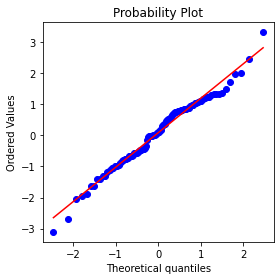

In [6]:
# 값표시 없이 그리기
fig, ax = plt.subplots(figsize = (4, 4))    # 그래프 사이즈
norm_sample = stats.norm.rvs(size=100)      # 표준정규분포의 랜덤 밸류 샘플 생성
stats.probplot(norm_sample, plot = ax)      # qq-plot그리기

plt.tight_layout()
plt.show()

**z-score를 오름차순으로 정렬하고, 각 값의 z-score를 y축에 표시한다. x축은 정규분포에서의 해당 분위수를 나타낸다. 데이터가 표준화되었기 때문에 단위는 평균으로부터 떨어진 데이터의 표준편차 수에 해당하게 된다.**

**점들이 대각선에 가까이 놓일수록 표본분포가 정규분포에 가까운 것으로 간주할 수 있다.**

정리

> z-score로 만드는 것은 비교를 목적으로 표준정규분포와 같은 척도로 만드는 것 뿐이다.

> 원시 데이터 자체는 대개 정규분포가 아니지만, 표본들의 평균과 합계, 그리고 오차는 정규분포를 따르는 때가 많다.

# 긴꼬리분포
---
2.7 Long-Tailed Distributions

용어

> tail: 적은 수의 극단값이 주로 존재하는, 도수분포의 길고 좁은 부분

> skewness(왜도): 분포의 한쪽 꼬리가 반대쪽 다른 꼬리보다 긴 정도

오차나 표본통계량의 분포를 볼 때 정규분포는 적절하고 유용하지만, 정규분포가 일반적으로 원시 데이터 분포의 특징을 나타내지는 않는다. 

분포의 꼬리는 양 극한 값에 해당하는데, 실무에서는 긴 꼬리를 중요시여긴다. (나심 탈레브의 black swan theory)


## 주가수익률로 보는 긴 꼬리

넷플릭스의 일일 주식 수익률에 대한 QQplot이다. _어라 넷플릭스 요즘 심각한데_

데이터셋은 sp500 이용

In [8]:
# data reading

sp500_px = pd.read_csv(SP500_DATA_CSV)
nflx = sp500_px.NFLX

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727092, 0.0015561067366313861, 0.9941828221936319))

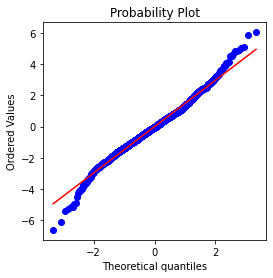

In [9]:
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx >0]))  # 다음값과의 차이로 값을 넣는다

# 그래프 그리기
fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

낮은 값들의 점은 대각선보다 훨씬 낮고, 높은 값은 선보다 훨씬 위에 위치한다. **이는 데이터가 정규분포를 따르지 않는다는 것을 의미한다.**

또한 이는 데이터가 정규분포를 따른다고 할 떄, 예상보다 훨씬 더 많은 극단값을 관찰할 가능성이 있음을 의미한다.

평균에서 표준편차 이내에 있는 데이터의 점들은 선에 가까이 있다.